**Algoritmo Laplaciano**

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [2]:
def laplacian_sharpening(img, K_size=3):
    H, W = img.shape
    pad = K_size // 2
 
    out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
 
    tmp = out.copy()
 
    # laplacian kernle
 
    K = [[0., 1., 0.],[1., -4., 1.], [0., 1., 0.]]
 
    # filtering and adding image -> Sharpening image
 
    for y in range(H):
 
        for x in range(W):
            out[pad + y, pad + x] = (-1) * np.sum(K * (tmp[y: y + K_size, x: x + K_size])) + tmp[pad + y, pad + x]
 
    out = np.clip(out, 0, 255)
 
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)
 
    return out

In [3]:
img = cv2.imread('burbuja.png',0).astype(np.float)
img=img.astype(float)
# Image sharpening by laplacian filter
 
out = laplacian_sharpening(img, K_size=3)

/tmp/ipykernel_4611/2121492204.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = cv2.imread('burbuja.png',0).astype(np.float)
/tmp/ipykernel_4611/1757411937.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
/tmp/ipykernel_4611/1757411937.py:6: DeprecationWarning: `np.flo

(-0.5, 189.5, 185.5, -0.5)

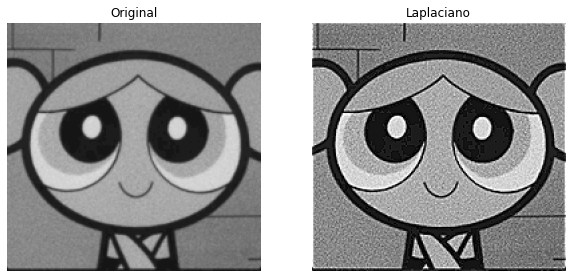

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(out, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Laplaciano')
ax[1].axis("off")

**Laplaciano Gausiano (LaG)**

https://theailearner.com/2019/05/25/laplacian-of-gaussian-log/

(-0.5, 357.5, 536.5, -0.5)

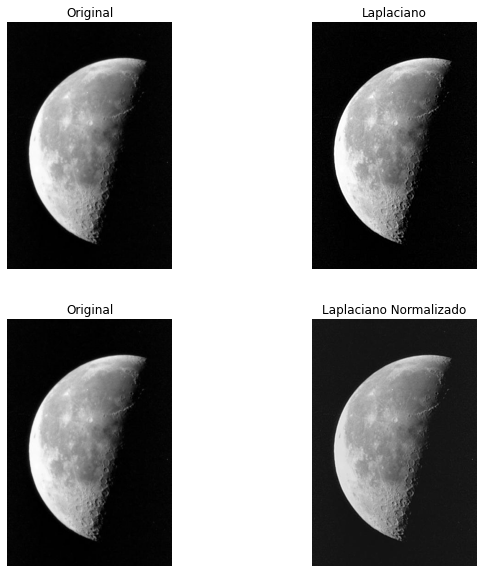

In [28]:
# Load the image in greyscale
img = cv2.imread('im19.jpg',0)
 
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
 
# Apply Laplacian operator in some higher datatype
laplacian = blur - cv2.Laplacian(blur,cv2.CV_64F)

#Para visualización se puede utilizar un equivalente del mat2gray
cv2.convertScaleAbs(laplacian,laplacian,alpha=1,beta=0)

# But this tends to localize the edge towards the brighter side.

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[0][0].set_title('Original')
ax[0][0].axis("off")

ax[0][1].imshow(laplacian, cmap='gray',vmin=0,vmax=255)
ax[0][1].set_title('Laplaciano')
ax[0][1].axis("off")

ax[1][0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[1][0].set_title('Original')
ax[1][0].axis("off")

ax[1][1].imshow(laplacian, cmap='gray',vmin=laplacian.min(),vmax=laplacian.max())
ax[1][1].set_title('Laplaciano Normalizado')    #OJO !!! no Limitar la gráfica a valores definidos (vmin=0,vmax=255)
ax[1][1].axis("off")

#print(laplacian)

(-0.5, 357.5, 536.5, -0.5)

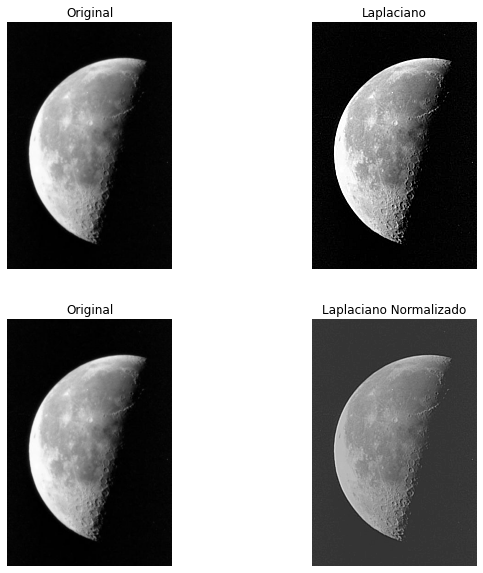

In [29]:
def customLaplacian(img):
    kernel = np.array([[1, 1, 1],
                    [1, -8, 1],
                    [1, 1, 1]])
    ans = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
    return ans

# Load the image in greyscale
img = cv2.imread('im19.jpg',0)
 
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
 
# Apply Laplacian operator in some higher datatype
blur = blur.astype(float)
laplacian = blur - customLaplacian(blur)

# But this tends to localize the edge towards the brighter side.

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[0][0].set_title('Original')
ax[0][0].axis("off")

ax[0][1].imshow(laplacian, cmap='gray',vmin=0,vmax=255)
ax[0][1].set_title('Laplaciano')
ax[0][1].axis("off")

ax[1][0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[1][0].set_title('Original')
ax[1][0].axis("off")

ax[1][1].imshow(laplacian, cmap='gray')
ax[1][1].set_title('Laplaciano Normalizado')    #OJO !!! no Limitar la gráfica a valores definidos (vmin=0,vmax=255)
ax[1][1].axis("off")